In [1]:
import matplotlib.pyplot as mp

import cartopy
import numpy
import xarray
import pandas
import netCDF4
import scipy.stats
import cmocean

mp.rcParams.update({'mathtext.default': 'regular'})

In [2]:
!ls /beegfs/DATA/pritchard/blangenb/CRU_DATA/

cru_ts4.01.1901.2016.pre.dat.nc  cru_ts4.01.1901.2016.tmp.dat.nc
cru_ts4.01.1901.2016.tmn.dat.nc  cru_ts4.01.1901.2016.tmx.dat.nc


In [3]:
pre_filename = '/beegfs/DATA/pritchard/blangenb/CRU_DATA/cru_ts4.01.1901.2016.pre.dat.nc'

ds_pre = xarray.open_dataset(pre_filename, decode_times=False)

pre_time_var = ds_pre['time']
pre_datetime = netCDF4.num2date(pre_time_var.values, \
                                pre_time_var.units, \
                                calendar='standard')

pre_time = pre_time_var.values
pre_data = ds_pre['pre'].values
pre_lon = ds_pre['lon'].values
pre_lat = ds_pre['lat'].values

In [4]:
tmp_filename = '/beegfs/DATA/pritchard/blangenb/CRU_DATA/cru_ts4.01.1901.2016.tmp.dat.nc'

ds_tmp = xarray.open_dataset(tmp_filename, decode_times=False)

tmp_time_var = ds_tmp['time']
tmp_datetime = netCDF4.num2date(tmp_time_var.values, \
                                tmp_time_var.units, \
                                calendar='standard')

tmp_time = tmp_time_var.values
tmp_data = ds_tmp['tmp'].values
tmp_lon = ds_tmp['lon'].values
tmp_lat = ds_tmp['lat'].values

In [5]:
print(pre_datetime[0], pre_datetime[-1])

1901-01-16 00:00:00 2016-12-16 00:00:00


In [6]:
pre_time_mean = numpy.nanmean(pre_data, axis=0)
tmp_time_mean = numpy.nanmean(tmp_data, axis=0)

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


/export/home/blangenb/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


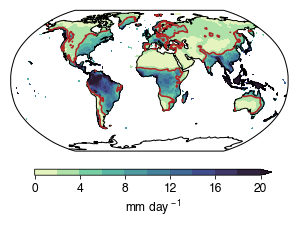

In [7]:
fontsize = 12

map_proj = cartopy.crs.Robinson()
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(4.25,2.5))

ax = fig.add_subplot(111, projection=map_proj)

levels = numpy.arange(0,21.1,2)
contour_plot = ax.contourf(pre_lon, pre_lat, \
                           pre_time_mean/12, \
                           levels=levels, \
                           cmap = cmocean.cm.deep, \
                           transform=data_proj, \
                           extend='max')

contour_line = ax.contour(pre_lon, pre_lat, \
                          pre_time_mean/12, \
                          levels=[4], \
                          colors=['firebrick'], \
                          transform=data_proj)

ax.coastlines()

axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x0,axpos.y0-0.15,axpos.width,0.0333])
cbar = fig.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal')

cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)

fig.tight_layout()

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


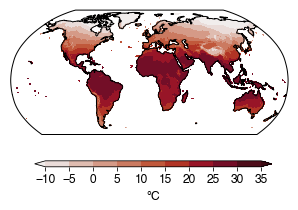

In [8]:
fontsize = 12

map_proj = cartopy.crs.Robinson()
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(4.25,2.5))

ax = fig.add_subplot(111, projection=map_proj)

levels = numpy.arange(-10,35.1,5)
contour_plot = ax.contourf(tmp_lon, tmp_lat, \
                           tmp_time_mean, \
                           levels=levels, \
                           cmap = cmocean.cm.amp, \
                           transform=data_proj, \
                           extend='both')

ax.coastlines()

axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x0,axpos.y0-0.15,axpos.width,0.0333])
cbar = fig.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal')

cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('$\degree$C', fontsize=fontsize)

fig.tight_layout()

In [9]:
lon_pcolormesh = numpy.zeros(pre_lon.size+2)
lon_pcolormesh[1:-1] = pre_lon
lon_pcolormesh[0] = pre_lon[0]-numpy.diff(pre_lon)[0]
lon_pcolormesh[-1] = pre_lon[-1]+numpy.diff(pre_lon)[-1]

lon_pcolormesh_mid = lon_pcolormesh[:-1]+0.5*(numpy.diff(lon_pcolormesh))

lat_pcolormesh = numpy.zeros(pre_lat.size+2)
lat_pcolormesh[1:-1] = pre_lat
lat_pcolormesh[0] = pre_lat[0]-numpy.diff(pre_lat)[0]
lat_pcolormesh[-1] = pre_lat[-1]+numpy.diff(pre_lat)[-1]

lat_pcolormesh_mid = lat_pcolormesh[:-1]+0.5*(numpy.diff(lat_pcolormesh))

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


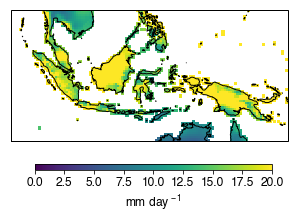

In [10]:
fontsize = 12

map_proj = cartopy.crs.PlateCarree()
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(4.25,2.5))

ax = fig.add_subplot(111, projection=map_proj)

contour_plot = ax.pcolormesh(lon_pcolormesh_mid, \
                             lat_pcolormesh_mid, \
                             pre_time_mean/12, \
                             vmin=0,vmax=20, \
                             transform=data_proj)

# levels = numpy.arange(0,21.1,2)
# contour_plot = ax.contourf(pre_lon, pre_lat, \
#                            pre_time_mean/12, \
#                            levels=levels, \
#                            cmap = cmocean.cm.deep, \
#                            transform=data_proj, \
#                            extend='max')

contour_line = ax.contour(pre_lon, pre_lat, \
                          pre_time_mean/12, \
                          levels=[4], \
                          colors=['firebrick'], \
                          transform=data_proj)

ax.coastlines(resolution='50m')
ax.set_extent([90,155,-13,13])

axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x0,axpos.y0-0.15,axpos.width,0.0333])
cbar = fig.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal')

cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)

fig.tight_layout()

calculate trends during 2000 to present day

1. get subsets of time for years you want the trend over

2. use ```scipy.stats.linregress``` to calculate trends

In [11]:
pre_time_indices = [t.year in range(2000,2018) for t in pre_datetime]
#pre_time_indices = [t.year in range(1901,2018) for t in pre_datetime]
pre_data_subset = pre_data[pre_time_indices,:,:]
pre_time_subset = pre_time[pre_time_indices]

In [12]:
tmp_time_indices = [t.year in range(2000,2018) for t in tmp_datetime]
#tmp_time_indices = [t.year in range(1901,2018) for t in tmp_datetime]
tmp_data_subset = tmp_data[tmp_time_indices,:,:]
tmp_time_subset = tmp_time[tmp_time_indices]

In [13]:
pre_trend = numpy.zeros((pre_lat.size,pre_lon.size))*numpy.nan
pre_pvals = numpy.zeros((pre_lat.size,pre_lon.size))*numpy.nan

for i in range(pre_lat.size):
    for j in range(pre_lon.size):
        pre_trend[i,j], blah, blah, pre_pvals[i,j], blah = \
        scipy.stats.linregress(pre_time_subset, pre_data_subset[:,i,j])

In [14]:
tmp_trend = numpy.zeros((tmp_lat.size,tmp_lon.size))*numpy.nan
tmp_pvals = numpy.zeros((tmp_lat.size,tmp_lon.size))*numpy.nan

for i in range(tmp_lat.size):
    for j in range(tmp_lon.size):
        tmp_trend[i,j], blah, blah, tmp_pvals[i,j], blah = \
        scipy.stats.linregress(tmp_time_subset, tmp_data_subset[:,i,j])

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


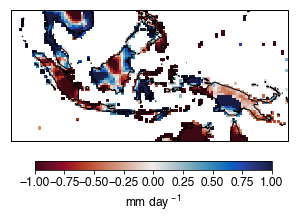

In [15]:
fontsize = 12

map_proj = cartopy.crs.PlateCarree()
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(4.25,2.5))

ax = fig.add_subplot(111, projection=map_proj)

contour_plot = ax.pcolormesh(lon_pcolormesh_mid, \
                             lat_pcolormesh_mid, \
                             pre_trend*365.25, \
                             vmin=-1,vmax=1, \
                             cmap = cmocean.cm.balance_r, \
                             transform=data_proj)

ax.coastlines(resolution='50m')
ax.set_extent([90,155,-13,13])

axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x0,axpos.y0-0.15,axpos.width,0.05])
cbar = fig.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal')
 
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('mm day$^{\,-1}$', fontsize=fontsize)

fig.tight_layout()

NameError: name 'trend_plot' is not defined

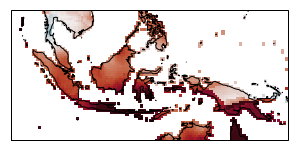

In [16]:
fontsize = 12

map_proj = cartopy.crs.PlateCarree()
data_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(4.25,2.5))

ax = fig.add_subplot(111, projection=map_proj)

contour_plot = ax.pcolormesh(lon_pcolormesh_mid, \
                             lat_pcolormesh_mid, \
                             tmp_trend*365.25*10., \
                             vmin=-.35,vmax=.35, \
                             cmap = cmocean.cm.balance, \
                             transform=data_proj)

ax.coastlines(resolution='50m')
ax.set_extent([90,155,-13,13])

fig.tight_layout()

# axpos = ax.get_position()
# cbar_ax = fig.add_axes([axpos.x0,axpos.y0-0.15,axpos.width,0.05])
# cbar = fig.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal')
 
# cbar_ax.tick_params(labelsize=fontsize)
# cbar.set_label('$\degree$C decade$^{\,-1}$', fontsize=fontsize)
# #cbar.set_ticks([-.3,-.2,-.1,0,.1,.2,.3])

cbar = mp.colorbar(trend_plot, orientation='horizontal')
cbar.ax.tick_params(labelsize=fontsize)
cbar.set_label('$\degree$C decade$^{\,-1}$', fontsize=fontsize)